**Part 4 of building a PlatiRes Map**   
Daniela Nachmanson *Fall 2017*

Since the component annotation in the previous part 3 gives such a huge collection of outputs, we will perform ssGSEA using a couple of well-established genesets in order to get a 'big picture' view of the biological meaning of the components.

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
# Geneset Enrichment Analysis on maps made with :  
## Marchion et al study and Harismendy bulk RNA seq gene list

In [1]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import gseapy
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Genelist: **From Marchion et al study and Harismendy bulk RNA seq gene list**

Number of gene-sets in each collection used:

In [3]:
num_hallmark_genesets = 50
num_reactome_genesets = 674
num_c6_genesets = 189
num_cgn_genesets = 427

## Import NMF H matrices and create .rnk files

In [4]:
#For carboplatin gene list: Using k=7
gene_list = 'original'
all_components = ccal.read_gct('../output/nmf_cc/nmf/nmf_k7_w.gct')

In [10]:
out_dir = '../output/GSEA/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
for component in all_components.columns:
        one_comp = all_components[component].sort_values(ascending=False)
        one_comp.head()
        one_comp.to_csv(out_dir + str(component) + '.' + str(gene_list) + '.rnk',sep='\t')

## Run GSEA Pre-Rank using GSEAPY and create output files for all.

In [9]:
# GSEA Pre-Rank with Hallmark genesets
gene_set = '../data/h.all.v6.1.symbols.gmt'
gene_set_name = 'Hallmark'
for component in all_components.columns:
    # run prerank
    in_file = out_dir + str(component) + '.' + str(gene_list) + '.rnk'
    out_file = out_dir + str(gene_set_name) + '.' + str(component) + '/'
    if not os.path.exists(out_file):
        os.makedirs(out_file)
    gseapy.prerank(rnk=in_file, gene_sets=gene_set, outdir=out_file)

/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/algorithm.py:492: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [np.sum(esnull < es.reshape(len(es),1), axis=1)/ np.sum(esnull < 0, axis=1),
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/algorithm.py:545: RuntimeWarning: Mean of empty slice.
  meanNeg = enrNull[enrNull < 0 ].mean()
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/plot.py:123: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  zero_score_ind = np.abs(rank_metric['rank']).argmin()
/Us

In [ ]:
# GSEA Pre-Rank with Reactome genesets
gene_set = '../data/c2.cp.reactome.v6.1.symbols.gmt'
gene_set_name = 'Reactome'
for component in all_components.columns:
    # run prerank
    in_file = out_dir + str(component) + '.' + str(gene_list) + '.rnk'
    out_file = out_dir + str(gene_set_name) + '.' + str(component) + '/'
    if not os.path.exists(out_file):
        os.makedirs(out_file)
    gseapy.prerank(rnk=in_file, gene_sets=gene_set, outdir=out_file)

In [7]:
# GSEA Pre-Rank with C6 genesets
gene_set = '../data/c6.all.v6.1.symbols.gmt'
gene_set_name = 'C6'
for component in all_components.columns:
    # run prerank
    in_file = out_dir + str(component) + '.' + str(gene_list) + '.rnk'
    out_file = out_dir + str(gene_set_name) + '.' + str(component) + '/'
    if not os.path.exists(out_file):
        os.makedirs(out_file)
    gseapy.prerank(rnk=in_file, gene_sets=gene_set, outdir=out_file)

/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/algorithm.py:492: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [np.sum(esnull < es.reshape(len(es),1), axis=1)/ np.sum(esnull < 0, axis=1),
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/algorithm.py:492: RuntimeWarning: invalid value encountered in true_divide
  choicelist = [np.sum(esnull < es.reshape(len(es),1), axis=1)/ np.sum(esnull < 0, axis=1),
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/algorithm.py:545: RuntimeWarning: Mean of empty slice.
  meanNeg = enrNull[enrNull < 0 ].mean()
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/plot.py:123: FutureWarning: 'argmin' is de

In [14]:
# GSEA Pre-Rank with C4 genesets
gene_set = '../data/c4.cgn.v6.1.symbols.gmt'
gene_set_name = 'CGN'
for component in all_components.columns:
    # run prerank
    in_file = out_dir + str(component) + '.' + str(gene_list) + '.rnk'
    out_file = out_dir + str(gene_set_name) + '.' + str(component) + '/'
    if not os.path.exists(out_file):
        os.makedirs(out_file)
    gseapy.prerank(rnk=in_file, gene_sets=gene_set, outdir=out_file)

/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/algorithm.py:492: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [np.sum(esnull < es.reshape(len(es),1), axis=1)/ np.sum(esnull < 0, axis=1),
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/algorithm.py:545: RuntimeWarning: Mean of empty slice.
  meanNeg = enrNull[enrNull < 0 ].mean()
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/DanielaNachmanson/anaconda2/envs/py35-2/lib/python3.5/site-packages/gseapy/plot.py:123: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  zero_score_ind = np.abs(rank_metric['rank']).argmin()
/Us

## Read in the results for each geneset

In [72]:
root_dir = '../output/GSEA/'
gene_set = 'Reactome'
e_scores = pd.DataFrame()
sig_genes = []

for k in ['C1','C2','C3','C4','C5','C6', 'C7']:
    results_pd = pd.read_csv(root_dir + gene_set + '.' + k + '/gseapy.prerank.gene_sets.report.csv')
    results_pd.rename(columns={'es':k},inplace=True) 
    # Multiple hypothesis testing correction
    results_pd['pval_adj'] = results_pd['pval']*num_reactome_genesets
    # Record all of the significant genes
    sig_genes.extend(results_pd[(results_pd['pval_adj'] < 0.05)]['Term'])
    # Add component to main dataframe
    reactome_e_scores_sig = e_scores[e_scores.index.isin(all_sig_genes)]
    results_pd.set_index('Term',inplace=True)
    e_scores = pd.concat([e_scores,(results_pd[[k]])],axis=1)
    
all_sig_genes = list(set(sig_genes))
reactome_e_scores_sig = e_scores[e_scores.index.isin(all_sig_genes)]

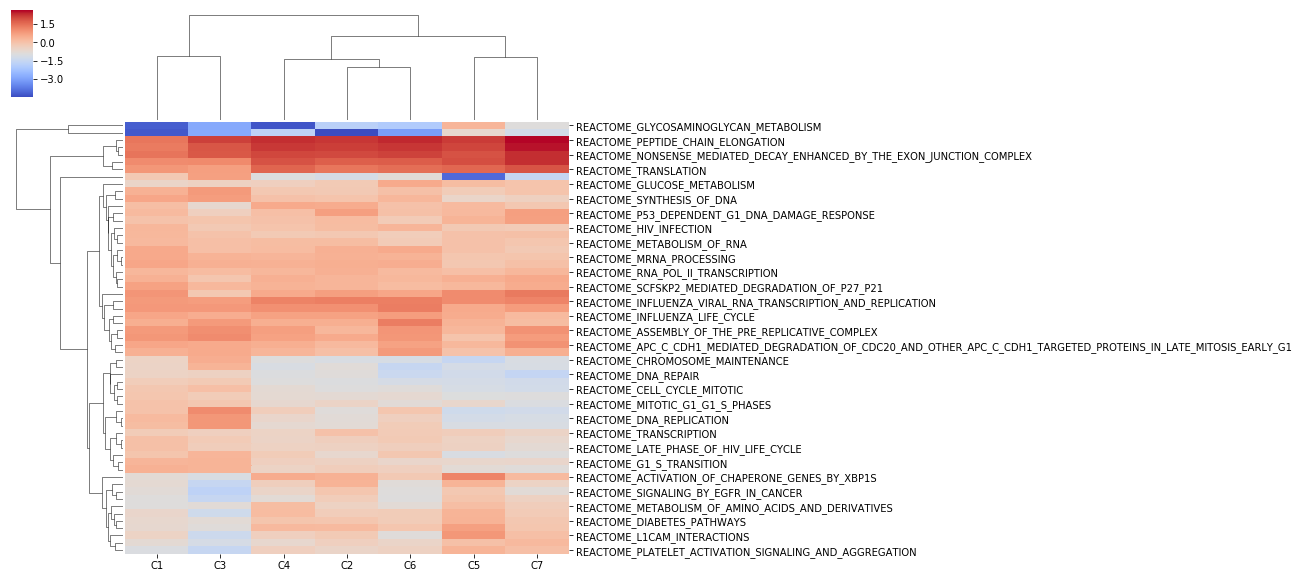

In [73]:
sns.clustermap(reactome_e_scores_sig,cmap="coolwarm",z_score=1)
plt.show()

In [74]:
root_dir = '../output/GSEA/'
gene_set = 'Hallmark'
e_scores = pd.DataFrame()
sig_genes = []

for k in ['C1','C2','C3','C4','C5','C6', 'C7']:
    results_pd = pd.read_csv(root_dir + gene_set + '.' + k + '/gseapy.prerank.gene_sets.report.csv')
    results_pd.rename(columns={'es':k},inplace=True) 
    # Multiple hypothesis testing correction
    results_pd['pval_adj'] = results_pd['pval']*num_hallmark_genesets
    # Record all of the significant genes
    sig_genes.extend(results_pd[(results_pd['pval_adj'] < 0.05)]['Term'])
    # Add component to main dataframe
    results_pd.set_index('Term',inplace=True)
    e_scores = pd.concat([e_scores,(results_pd[[k]])],axis=1)
    
all_sig_genes = list(set(sig_genes))
hallmark_e_scores_sig = e_scores[e_scores.index.isin(all_sig_genes)]

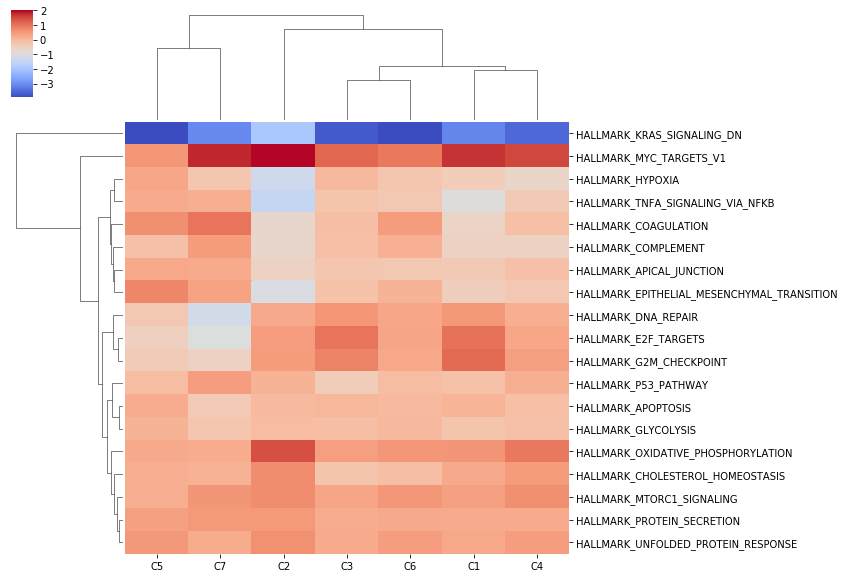

In [69]:
sns.clustermap(hallmark_e_scores_sig,cmap="coolwarm",z_score=1)
plt.show()

Combine both Reactome and Hallmark significatn genes to view them together,
note that not displating all of them because this is too many but looking at the ones with highest variance.

In [77]:
both_gene_sets = pd.concat([reactome_e_scores_sig,hallmark_e_scores_sig])
most_var = both_gene_sets.std(axis=1).sort_values()[40:].index
most_var_gene_sets = both_gene_sets[both_gene_sets.index.isin(most_var)]
len(both_gene_sets)

78

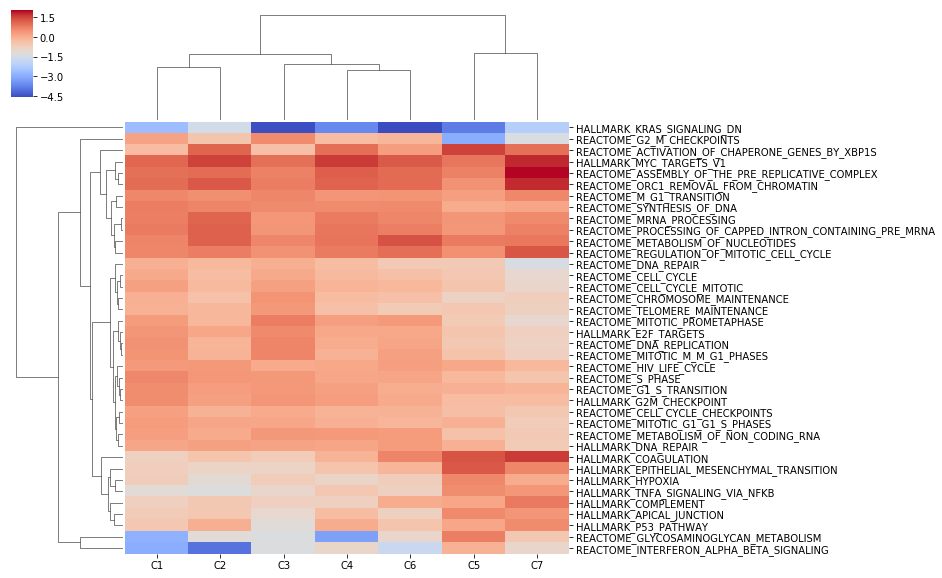

In [78]:
sns.clustermap(most_var_gene_sets,cmap="coolwarm",z_score=1)
plt.show()

### Since the Hallmark and Reactome aren't telling me alot about the differences between the components, trying a couple other genesets in order to see if they give me more information

In [9]:
root_dir = '../output/GSEA/'
gene_set = 'C6'
e_scores = pd.DataFrame()
sig_genes = []

for k in ['C1','C2','C3','C4','C5','C6', 'C7']:
    results_pd = pd.read_csv(root_dir + gene_set + '.' + k + '/gseapy.prerank.gene_sets.report.csv')
    results_pd.rename(columns={'es':k},inplace=True) 
    # Multiple hypothesis testing correction
    results_pd['pval_adj'] = results_pd['pval']*num_c6_genesets
    #*num_reactome_genesets
    # Record all of the significant genes
    sig_genes.extend(results_pd[(results_pd['pval_adj'] < 0.05)]['Term'])
    # Add component to main dataframe
    results_pd.set_index('Term',inplace=True)
    e_scores = pd.concat([e_scores,(results_pd[[k]])],axis=1)
    
all_sig_genes = list(set(sig_genes))
oncogenic_e_scores_sig = e_scores[e_scores.index.isin(all_sig_genes)]

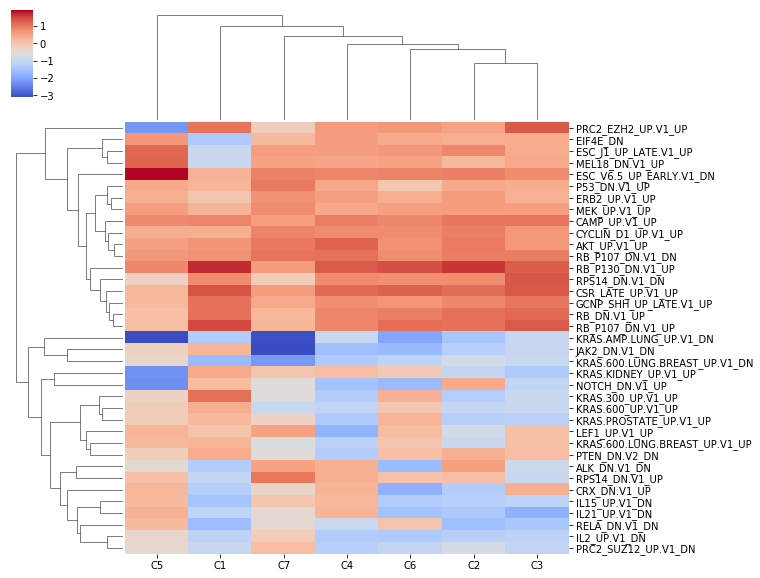

In [12]:
sns.clustermap(oncogenic_e_scores_sig,cmap="coolwarm",z_score=1)
plt.show()

In [17]:
root_dir = '../output/GSEA/'
gene_set = 'CGN'
e_scores = pd.DataFrame()
sig_genes = []

for k in ['C1','C2','C3','C4','C5','C6', 'C7']:
    results_pd = pd.read_csv(root_dir + gene_set + '.' + k + '/gseapy.prerank.gene_sets.report.csv')
    results_pd.rename(columns={'es':k},inplace=True) 
    # Multiple hypothesis testing correction
    results_pd['pval_adj'] = results_pd['pval']*num_cgn_genesets
    #*num_reactome_genesets
    # Record all of the significant genes
    sig_genes.extend(results_pd[(results_pd['pval_adj'] < 0.005)]['Term'])
    # Add component to main dataframe
    results_pd.set_index('Term',inplace=True)
    e_scores = pd.concat([e_scores,(results_pd[[k]])],axis=1)
    
all_sig_genes = list(set(sig_genes))
cgn_e_scores_sig = e_scores[e_scores.index.isin(all_sig_genes)]

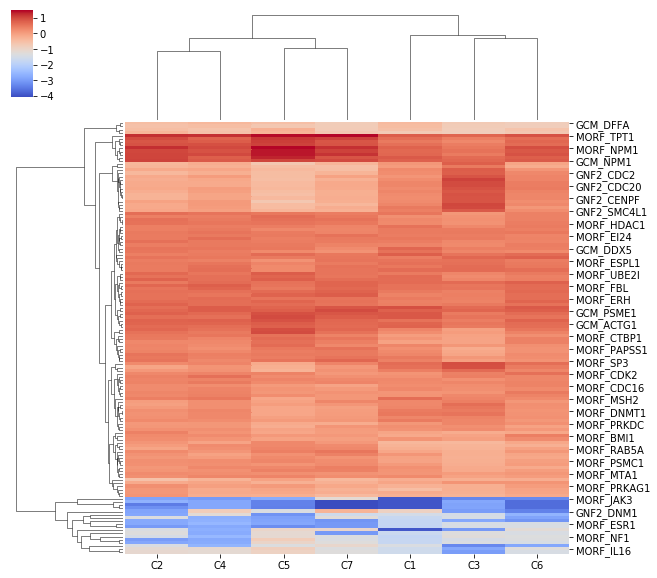

In [18]:
sns.clustermap(cgn_e_scores_sig,cmap="coolwarm",z_score=1)
plt.show()

### Hallmark gene sets cheat sheet

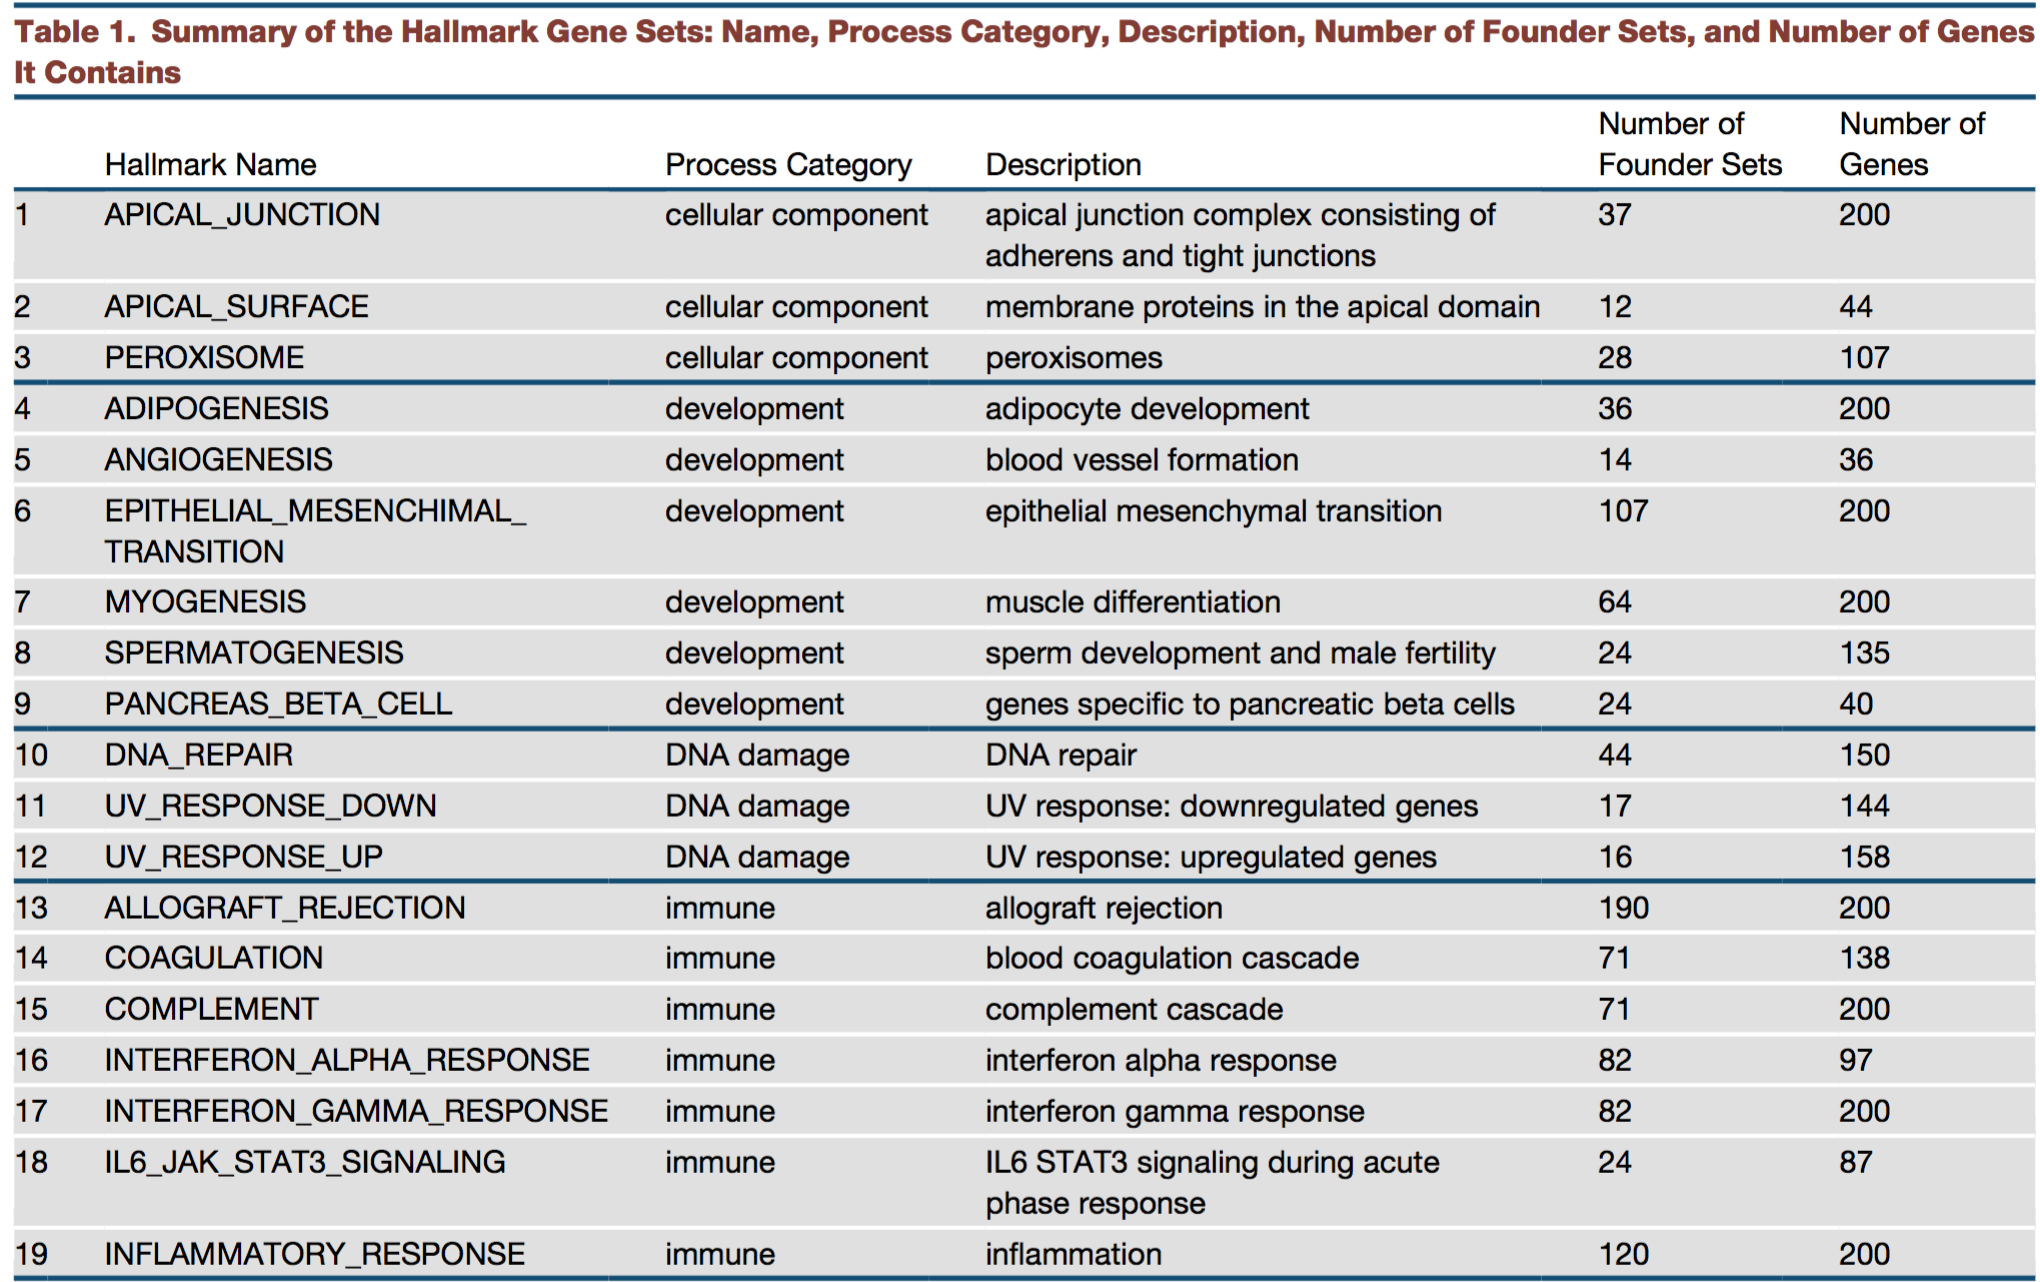


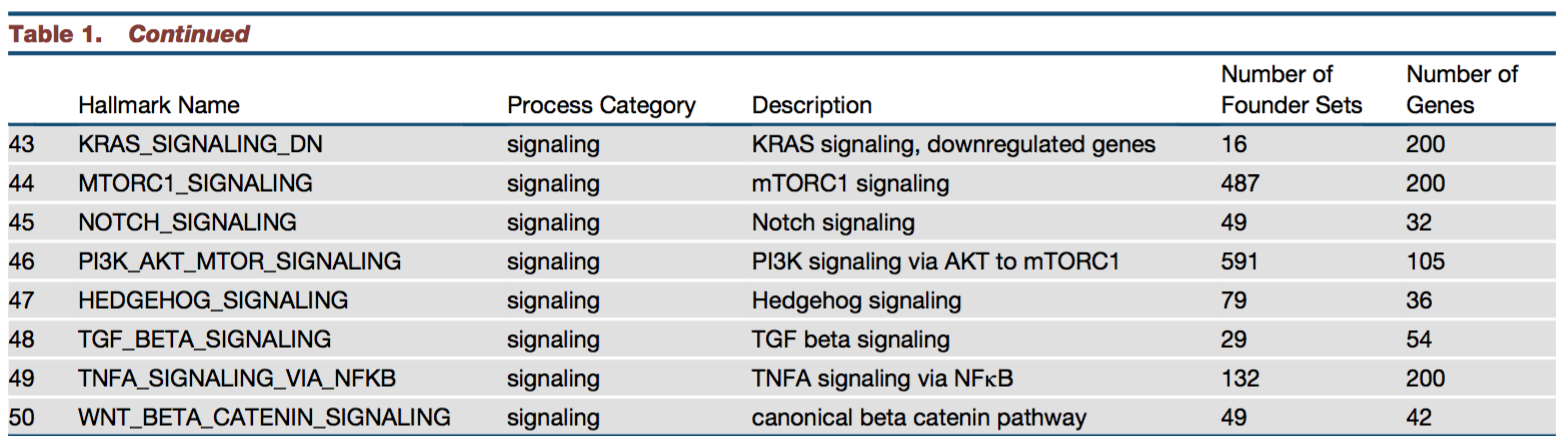